# Adult Census Income
Predict whether income exceeds $50K/yr based on census data

<div class="alert alert-block alert-info">

<h1 style="font-family:verdana;"> Description:</h1> 

<ul>
<li><p style="font-family:verdana;">
In this notebook, we are going to predict whether a person's income is above 50k or below 50k using various features like age, education, and occupation.
</p></li>
    
<li><p style="font-family:verdana;">
The dataset we are going to use is the Adult census income dataset from Kaggle which contains about 32561 rows and 15 features that can be downloaded <a href="https://www.kaggle.com/uciml/adult-census-income">here</a>.
</p></li> 

<li><p style="font-family:verdana;">
The dataset contains the labels which we have to predict and the labels are discrete and binary. So the problem we have is a Supervised Classification type.
</p></li>  
</ul>

</div>

## Step 0: Load libraries and dataset

In [9]:
# from google.colab import drive
# drive.mount('/content/drive')

In [2]:
import os
workingDir = 'C:\\Users\\hoang\Desktop\\AI Project\Adult Census Income'
os.chdir(workingDir + '\\dataset')

In [3]:
os.listdir()

['adult(EDA only).csv',
 'adult.csv',
 'bi2.png',
 'bi3.png',
 'Customer Data.csv',
 'heatmap.png',
 'multi1.png',
 'multi2.png']

In [13]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [14]:
# Importing dataset
dataset = pd.read_csv('adult.csv')
print(dataset.shape)

(32561, 15)


In [15]:
display(dataset.head())

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K


## Step 1. Problem Understanding : 
Feature ? Target ? Classification or Regression 

Feature : 
 - age	            : age of a citizen
 - workclass	        : workclass of a citizen
 - fnlwgt	            : final weight of a citizen
 - education	        : education degree of a citizen 
 - education.num	    : number of years for education of a citizen
 - marital.status	    : status of marriage 
 - occupation	        : occupation of a citizen
 - relationship	    : relationship or role in family 
 - race	            : race of citizen
 - sex	            : gender of a citizen
 - capital.gain	    : Short-term gains come from the income you have owned for one year or less.
 - capital.loss	    : Short-term gains come from the income you have lost for one year or less.
 - hours.per.week	  : working hours in a week
 - native.country   : Original Country 

 Target : 
  - income : <=50k or >50k  <br>
  
 Type of Problem : Classification <br>
 
 Business Value : 
understand the standard of living of an area

## Step 2. EDA: 

**Data Understanding** 

**Missing Values ?** <br>
There is no missing value according to the number of rows. <br>
Check if columns of type Categorical are invalid or not?
We see columns with unreasonable values: <br>
- capital.gain (min = 0), capital.loss (min = 0), 
- workclass (value = "?"), occupation (value = "?"), native.country (value = "?")

**Outlier (Noise) ?** <br>
We don't see any large outliers but visualization is recommended to determine if there are small outliers. 

**Inconsistent ?** <br>
Basically no inconsistent data but need to output unique() or value_counts() to double check.

**Imbalanced ?** <br>
Imbalanced data: target with 75% (24720/32561) of income <= 50K and 25% then income > 50k

**Skewness ?**  We only care about numeric data <br> 
abs(mean - median)/std < 0.2 : is OK else is skew <br>
capital.gain, capital.loss have a skewness problem <br>



In [16]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education.num   32561 non-null  int64 
 5   marital.status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital.gain    32561 non-null  int64 
 11  capital.loss    32561 non-null  int64 
 12  hours.per.week  32561 non-null  int64 
 13  native.country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [17]:
# Statistical summary
dataset.describe()

,age,fnlwgt,education.num,capital.gain,capital.loss,hours.per.week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [18]:
dataset.describe(include = 'O')

,workclass,education,marital.status,occupation,relationship,race,sex,native.country,income
count,32561,32561,32561,32561,32561,32561,32561,32561,32561
unique,9,16,7,15,6,5,2,42,2
top,Private,HS-grad,Married-civ-spouse,Prof-specialty,Husband,White,Male,United-States,<=50K
freq,22696,10501,14976,4140,13193,27816,21790,29170,24720


In [19]:
# check for null values
round((dataset.isnull().sum() / dataset.shape[0])
      * 100, 2).astype(str) + ' %'

age               0.0 %
workclass         0.0 %
fnlwgt            0.0 %
education         0.0 %
education.num     0.0 %
marital.status    0.0 %
occupation        0.0 %
relationship      0.0 %
race              0.0 %
sex               0.0 %
capital.gain      0.0 %
capital.loss      0.0 %
hours.per.week    0.0 %
native.country    0.0 %
income            0.0 %
dtype: object

In [20]:
for col in dataset.describe(include = 'O').columns:
    print(f"\n-- Checking columns {col} --")
    display(dataset[col].value_counts())


-- Checking columns workclass --


Private             22696
Self-emp-not-inc     2541
Local-gov            2093
?                    1836
State-gov            1298
Self-emp-inc         1116
Federal-gov           960
Without-pay            14
Never-worked            7
Name: workclass, dtype: int64


-- Checking columns education --


HS-grad         10501
Some-college     7291
Bachelors        5355
Masters          1723
Assoc-voc        1382
11th             1175
Assoc-acdm       1067
10th              933
7th-8th           646
Prof-school       576
9th               514
12th              433
Doctorate         413
5th-6th           333
1st-4th           168
Preschool          51
Name: education, dtype: int64


-- Checking columns marital.status --


Married-civ-spouse       14976
Never-married            10683
Divorced                  4443
Separated                 1025
Widowed                    993
Married-spouse-absent      418
Married-AF-spouse           23
Name: marital.status, dtype: int64


-- Checking columns occupation --


Prof-specialty       4140
Craft-repair         4099
Exec-managerial      4066
Adm-clerical         3770
Sales                3650
Other-service        3295
Machine-op-inspct    2002
?                    1843
Transport-moving     1597
Handlers-cleaners    1370
Farming-fishing       994
Tech-support          928
Protective-serv       649
Priv-house-serv       149
Armed-Forces            9
Name: occupation, dtype: int64


-- Checking columns relationship --


Husband           13193
Not-in-family      8305
Own-child          5068
Unmarried          3446
Wife               1568
Other-relative      981
Name: relationship, dtype: int64


-- Checking columns race --


White                 27816
Black                  3124
Asian-Pac-Islander     1039
Amer-Indian-Eskimo      311
Other                   271
Name: race, dtype: int64


-- Checking columns sex --


Male      21790
Female    10771
Name: sex, dtype: int64


-- Checking columns native.country --


United-States                 29170
Mexico                          643
?                               583
Philippines                     198
Germany                         137
Canada                          121
Puerto-Rico                     114
El-Salvador                     106
India                           100
Cuba                             95
England                          90
Jamaica                          81
South                            80
China                            75
Italy                            73
Dominican-Republic               70
Vietnam                          67
Guatemala                        64
Japan                            62
Poland                           60
Columbia                         59
Taiwan                           51
Haiti                            44
Iran                             43
Portugal                         37
Nicaragua                        34
Peru                             31
Greece                      


-- Checking columns income --


<=50K    24720
>50K      7841
Name: income, dtype: int64

In [21]:
# Check for %'?' in dataset
round((dataset.isin(['?']).sum() / dataset.shape[0])
      * 100, 2).astype(str) + ' %'

age                0.0 %
workclass         5.64 %
fnlwgt             0.0 %
education          0.0 %
education.num      0.0 %
marital.status     0.0 %
occupation        5.66 %
relationship       0.0 %
race               0.0 %
sex                0.0 %
capital.gain       0.0 %
capital.loss       0.0 %
hours.per.week     0.0 %
native.country    1.79 %
income             0.0 %
dtype: object

In [22]:
# Checking the counts of label categories
income = dataset['income'].value_counts(normalize=True)
round(income * 100, 2).astype('str') + ' %'

<=50K    75.92 %
>50K     24.08 %
Name: income, dtype: object

<div class="alert alert-block alert-info">

<h3 style="font-family:verdana;"> Observations:</h3>

<ul>
    
<li><p style="font-family:verdana;">
The dataset doesn't have any null values, but it contains missing values in the form of '?' which needs to be preprocessed.
</p></li>    

<li><p style="font-family:verdana;">
The dataset is unbalanced, as the dependent feature 'income' contains 75.92% values have income less than 50k and 24.08% values have income more than 50k.
</p></li>    

</ul>

</div>

**Feature Understanding**

Visualization on Univariate, BiVariate and MultiVariate Analysis

### 2.1: Univariate Analysis

- Creating a barplot for 'Income'

We see that the number of people with income > 50K is only 1/3 of the number of people with income <= 50K.

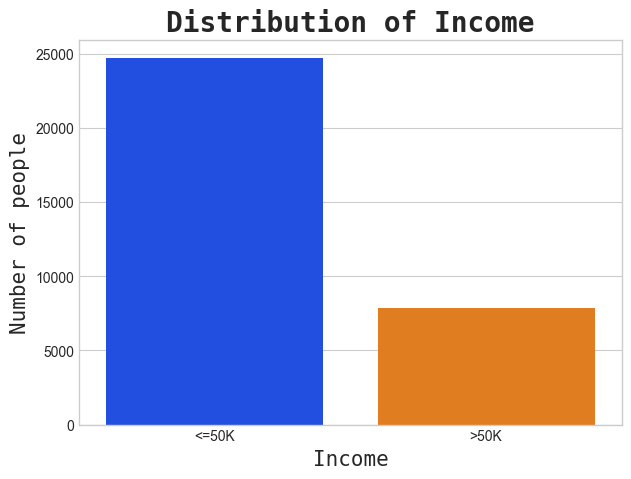

In [23]:
income = dataset['income'].value_counts()

plt.style.use('seaborn-whitegrid')
plt.figure(figsize=(7, 5))
sns.barplot(x=income.index, y=income.values, palette='bright')
plt.title('Distribution of Income', fontdict={
          'fontname': 'Monospace', 'fontsize': 20, 'fontweight': 'bold'})
plt.xlabel('Income', fontdict={'fontname': 'Monospace', 'fontsize': 15})
plt.ylabel('Number of people', fontdict={
           'fontname': 'Monospace', 'fontsize': 15})
plt.tick_params(labelsize=10)
plt.show()

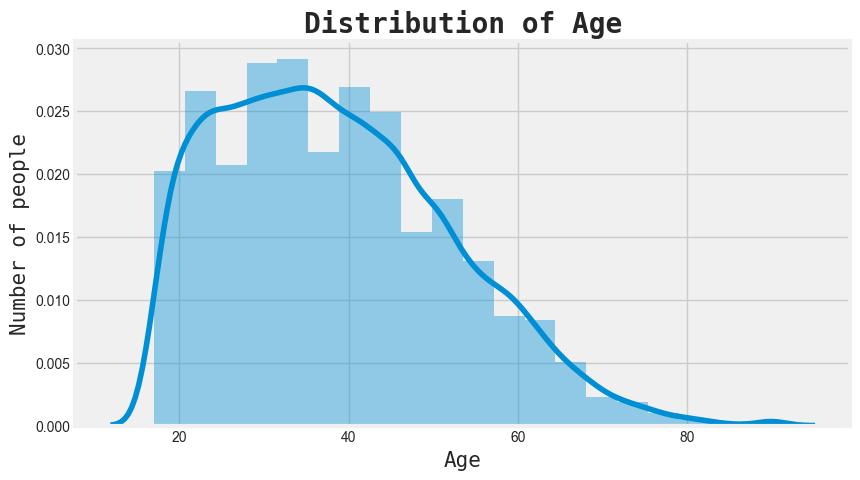

In [24]:
age = dataset['age'].value_counts()

plt.figure(figsize=(10, 5))
plt.style.use('fivethirtyeight')
sns.distplot(dataset['age'], bins=20)
plt.title('Distribution of Age', fontdict={
          'fontname': 'Monospace', 'fontsize': 20, 'fontweight': 'bold'})
plt.xlabel('Age', fontdict={'fontname': 'Monospace', 'fontsize': 15})
plt.ylabel('Number of people', fontdict={
           'fontname': 'Monospace', 'fontsize': 15})
plt.tick_params(labelsize=10)
plt.show()

- Creating a distribution plot for 'Age'

We see the majority of people graduated from high school (HS-grad) or College.

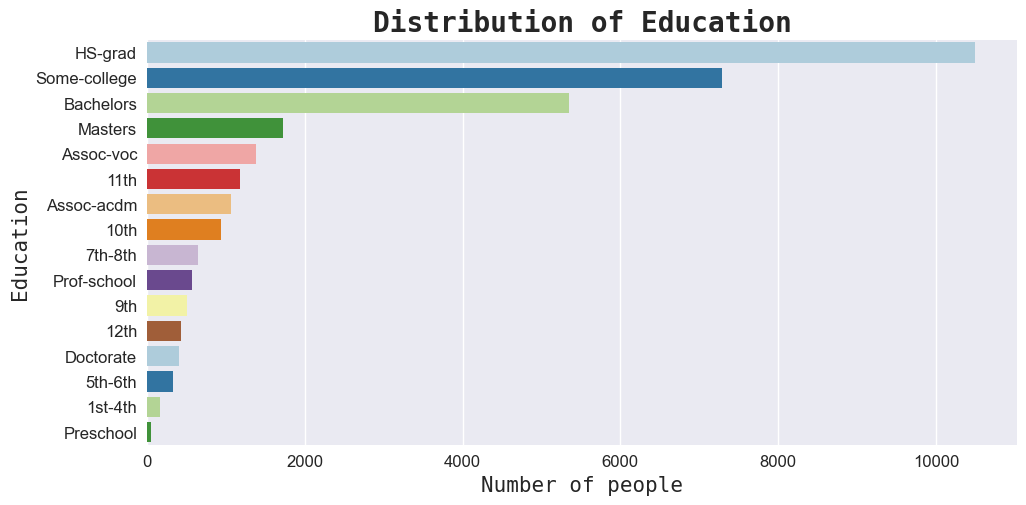

In [25]:
# Creating a barplot for 'Education'
edu = dataset['education'].value_counts()

plt.style.use('seaborn')
plt.figure(figsize=(10, 5))
sns.barplot(x=edu.values, y=edu.index, palette='Paired')
plt.title('Distribution of Education', fontdict={
          'fontname': 'Monospace', 'fontsize': 20, 'fontweight': 'bold'})
plt.xlabel('Number of people', fontdict={
           'fontname': 'Monospace', 'fontsize': 15})
plt.ylabel('Education', fontdict={'fontname': 'Monospace', 'fontsize': 15})
plt.tick_params(labelsize=12)
plt.show()

- Creating a barplot for 'Years of Education'

Most of the population have 9 or 10 years of education.

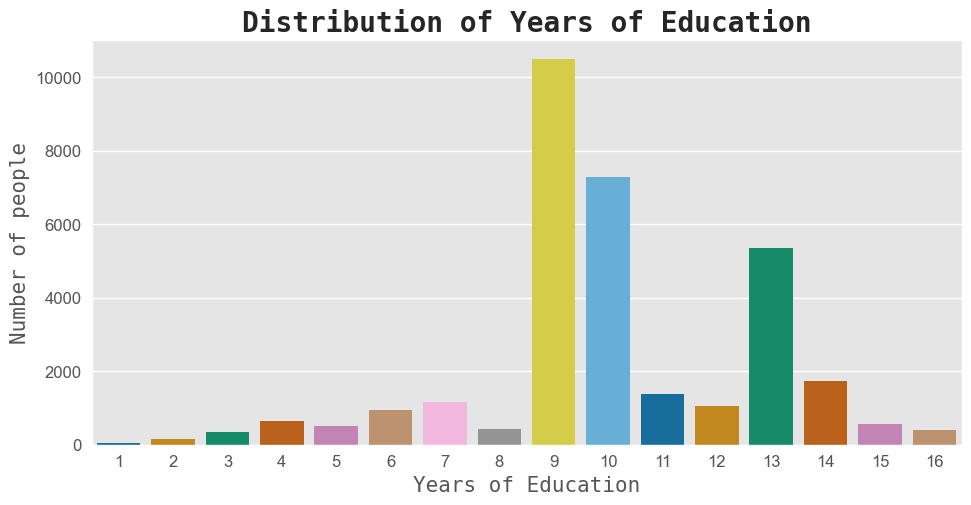

In [26]:
edu_num = dataset['education.num'].value_counts()

plt.style.use('ggplot')
plt.figure(figsize=(10, 5))
sns.barplot(x=edu_num.index, y=edu_num.values, palette='colorblind')
plt.title('Distribution of Years of Education', fontdict={
          'fontname': 'Monospace', 'fontsize': 20, 'fontweight': 'bold'})
plt.xlabel('Years of Education', fontdict={
           'fontname': 'Monospace', 'fontsize': 15})
plt.ylabel('Number of people', fontdict={
           'fontname': 'Monospace', 'fontsize': 15})
plt.tick_params(labelsize=12)
plt.show()

- Creating a pie chart for 'Marital status'

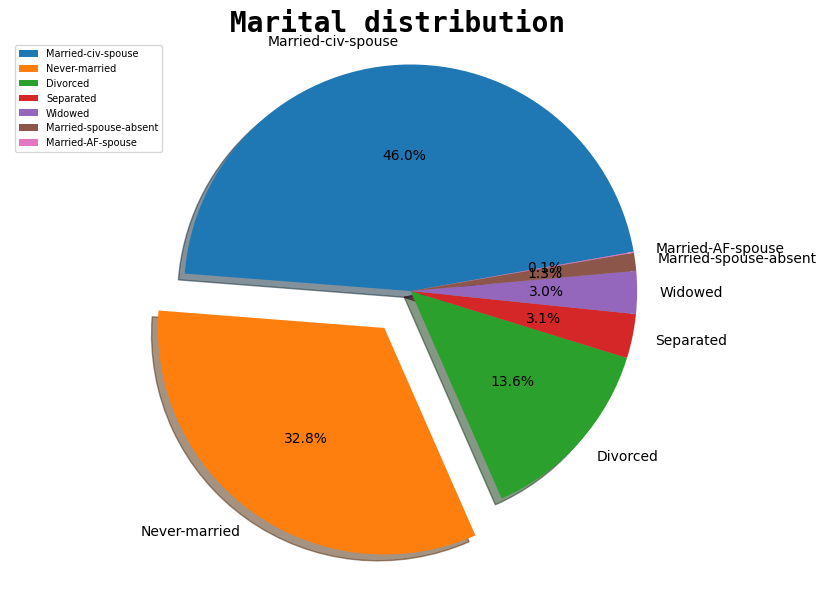

In [27]:

marital = dataset['marital.status'].value_counts()

plt.style.use('default')
plt.figure(figsize=(10, 7))
plt.pie(marital.values, labels=marital.index, startangle=10, explode=(
    0, 0.20, 0, 0, 0, 0, 0), shadow=True, autopct='%1.1f%%')
plt.title('Marital distribution', fontdict={
          'fontname': 'Monospace', 'fontsize': 20, 'fontweight': 'bold'})
plt.legend()
plt.legend(prop={'size': 7})
plt.axis('equal')
plt.show()

- Creating a donut chart for 'relationship'

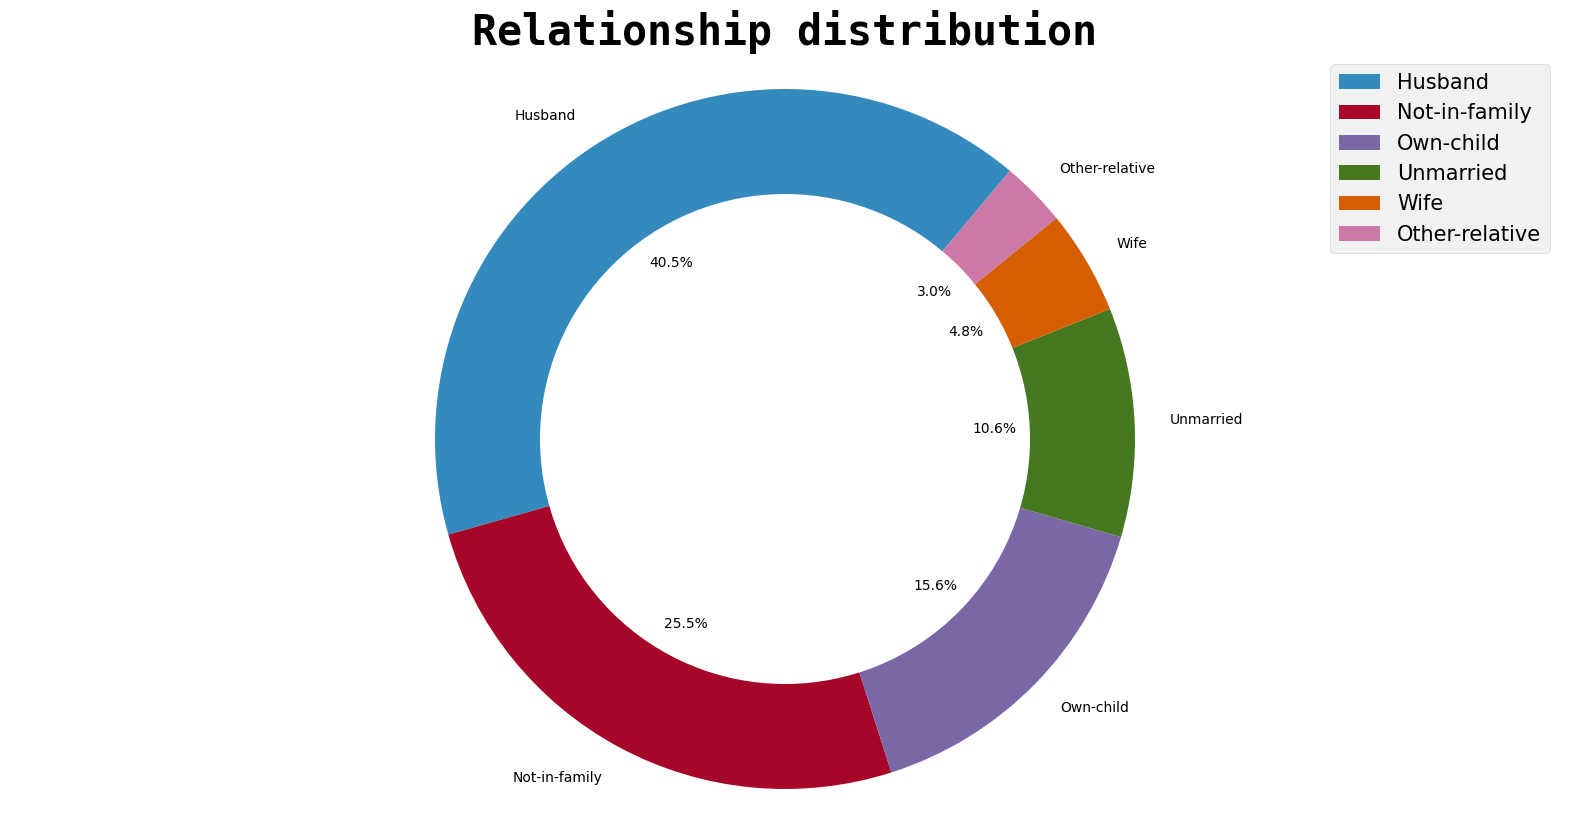

In [28]:
relation = dataset['relationship'].value_counts()

plt.style.use('bmh')
plt.figure(figsize=(20, 10))
plt.pie(relation.values, labels=relation.index,
        startangle=50, autopct='%1.1f%%')
centre_circle = plt.Circle((0, 0), 0.7, fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
plt.title('Relationship distribution', fontdict={
          'fontname': 'Monospace', 'fontsize': 30, 'fontweight': 'bold'})
plt.axis('equal')
plt.legend(prop={'size': 15})
plt.show()

- Creating a barplot for 'Sex'

We see that the number of men is twice as many as women, this population community has a severe gender imbalance.

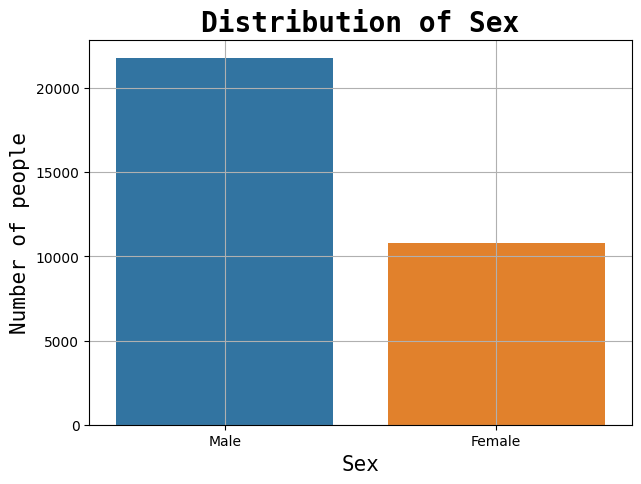

In [29]:
sex = dataset['sex'].value_counts()

plt.style.use('default')
plt.figure(figsize=(7, 5))
sns.barplot(x=sex.index, y=sex.values)
plt.title('Distribution of Sex', fontdict={
          'fontname': 'Monospace', 'fontsize': 20, 'fontweight': 'bold'})
plt.xlabel('Sex', fontdict={'fontname': 'Monospace', 'fontsize': 15})
plt.ylabel('Number of people', fontdict={
           'fontname': 'Monospace', 'fontsize': 15})
plt.tick_params(labelsize=10)
plt.grid()
plt.show()

In [30]:
# !pip install squarify

- Creating a Treemap for 'Race'

Whites are the majority in this community. The black community is only 1/9 of the white population. Meanwhile, Asians are only 1/3 of blacks.

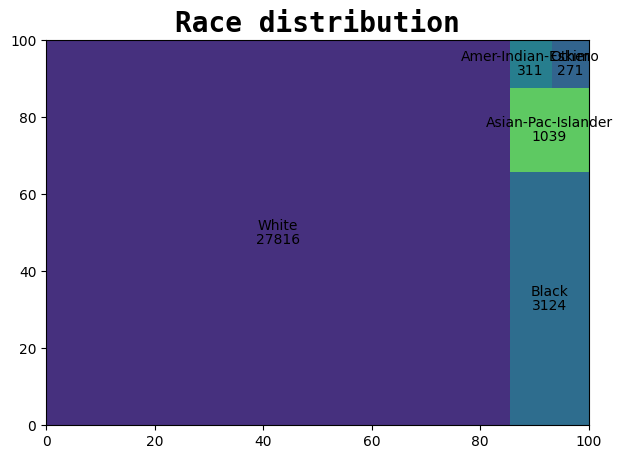

In [31]:
import squarify
race = dataset['race'].value_counts()

plt.style.use('default')
plt.figure(figsize=(7, 5))
squarify.plot(sizes=race.values, label=race.index, value=race.values)
plt.title('Race distribution', fontdict={
          'fontname': 'Monospace', 'fontsize': 20, 'fontweight': 'bold'})
plt.show()

- Creating a barplot for 'Hours per week'

Most people work 40 hours a week (equivalent to 8 hours a day). This is reasonable.

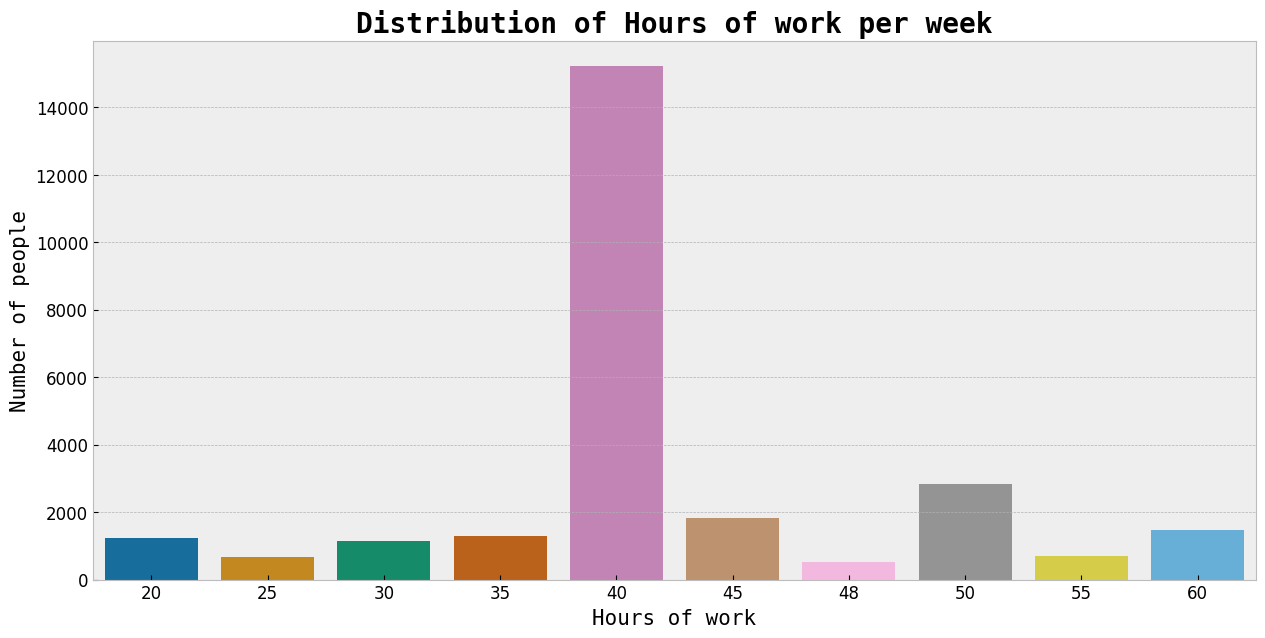

In [32]:

hours = dataset['hours.per.week'].value_counts().head(10)

plt.style.use('bmh')
plt.figure(figsize=(15, 7))
sns.barplot(x=hours.index, y=hours.values, palette='colorblind')
plt.title('Distribution of Hours of work per week', fontdict={
          'fontname': 'Monospace', 'fontsize': 20, 'fontweight': 'bold'})
plt.xlabel('Hours of work', fontdict={'fontname': 'Monospace', 'fontsize': 15})
plt.ylabel('Number of people', fontdict={
           'fontname': 'Monospace', 'fontsize': 15})
plt.tick_params(labelsize=12)
plt.show()

### 2.2 Bivariate Analysis

- Creating a countplot of income across age

Based on the chart we see nothing unusual. The younger the person, the lower the income. Under 25 years old, most of the income is under 50K. The older you are, the higher your income.

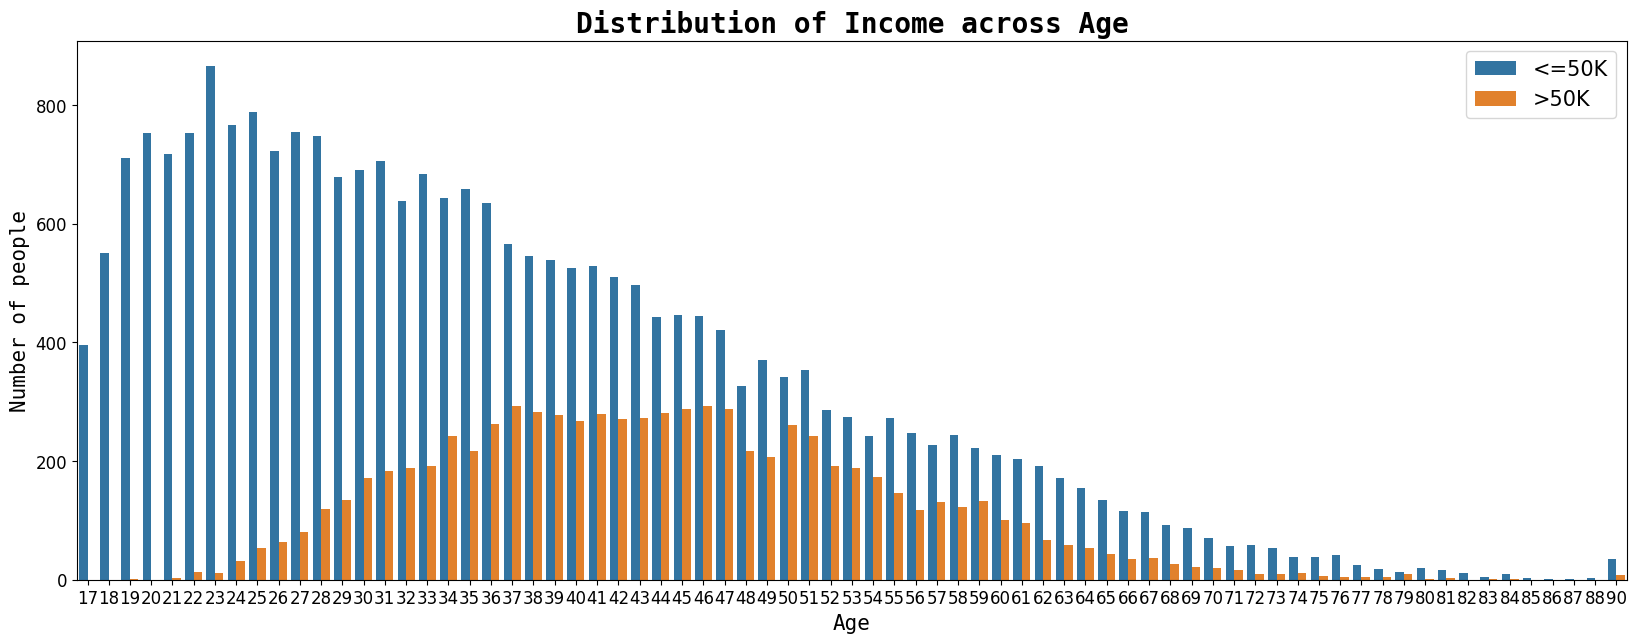

In [33]:

plt.style.use('default')
plt.figure(figsize=(20, 7))
sns.countplot(x=dataset['age'], hue=dataset['income'])
plt.title('Distribution of Income across Age', fontdict={
          'fontname': 'Monospace', 'fontsize': 20, 'fontweight': 'bold'})
plt.xlabel('Age', fontdict={'fontname': 'Monospace', 'fontsize': 15})
plt.ylabel('Number of people', fontdict={
           'fontname': 'Monospace', 'fontsize': 15})
plt.tick_params(labelsize=12)
plt.legend(loc=1, prop={'size': 15})
plt.show()

- Creating a countplot of income across education

We see that if you only graduate from high school or college and then go to work, it is very difficult to earn an income of 50K or more. Instead, to increase our income, we should study more bachelor or master.

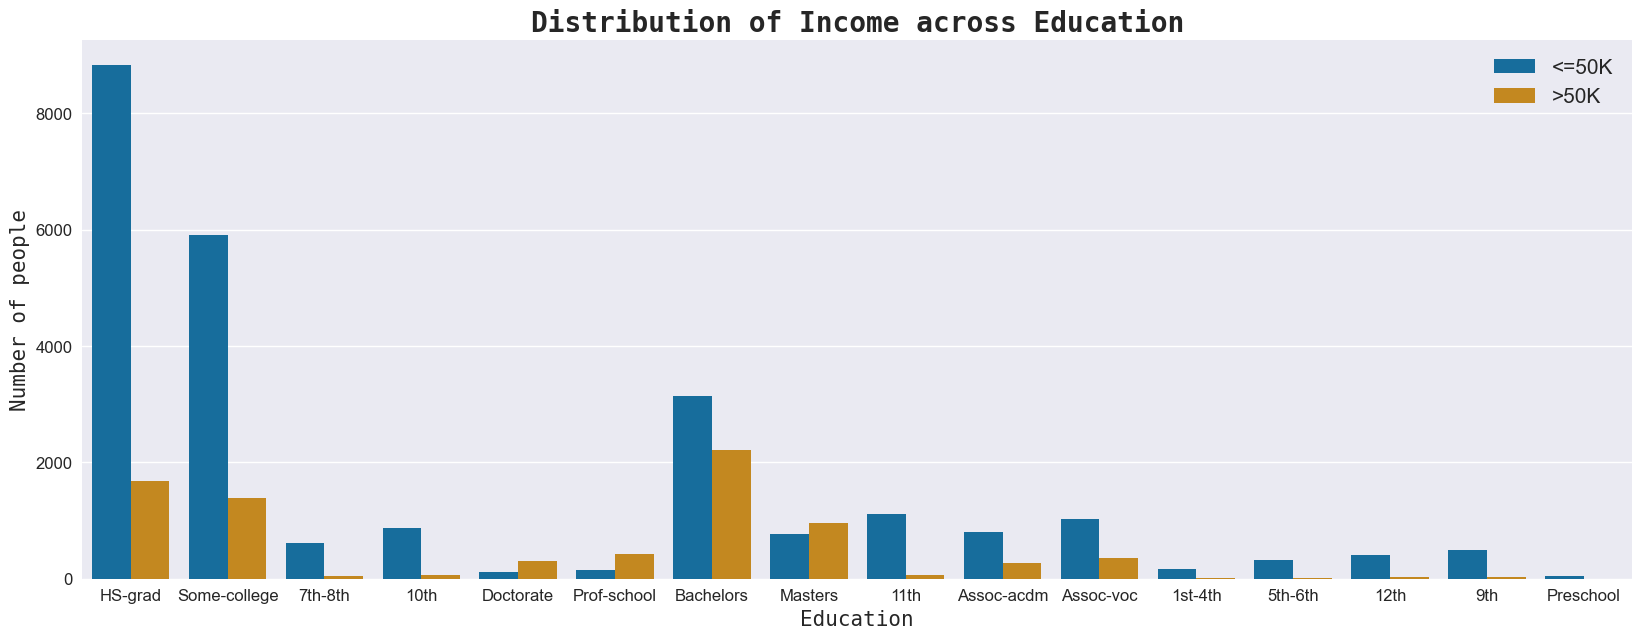

In [34]:
plt.style.use('seaborn')
plt.figure(figsize=(20, 7))
sns.countplot(x=dataset['education'],
              hue=dataset['income'], palette='colorblind')
plt.title('Distribution of Income across Education', fontdict={
          'fontname': 'Monospace', 'fontsize': 20, 'fontweight': 'bold'})
plt.xlabel('Education', fontdict={'fontname': 'Monospace', 'fontsize': 15})
plt.ylabel('Number of people', fontdict={
           'fontname': 'Monospace', 'fontsize': 15})
plt.tick_params(labelsize=12)
plt.legend(loc=1, prop={'size': 15})
plt.show()

- Creating a countplot of income across years of education

It is clear that income is directly proportional to the number of years of education. Instead of stopping at 9 or 10 years of education, we should study for a few more years before going to work, the possibility of achieving an income of over 50K will be higher.

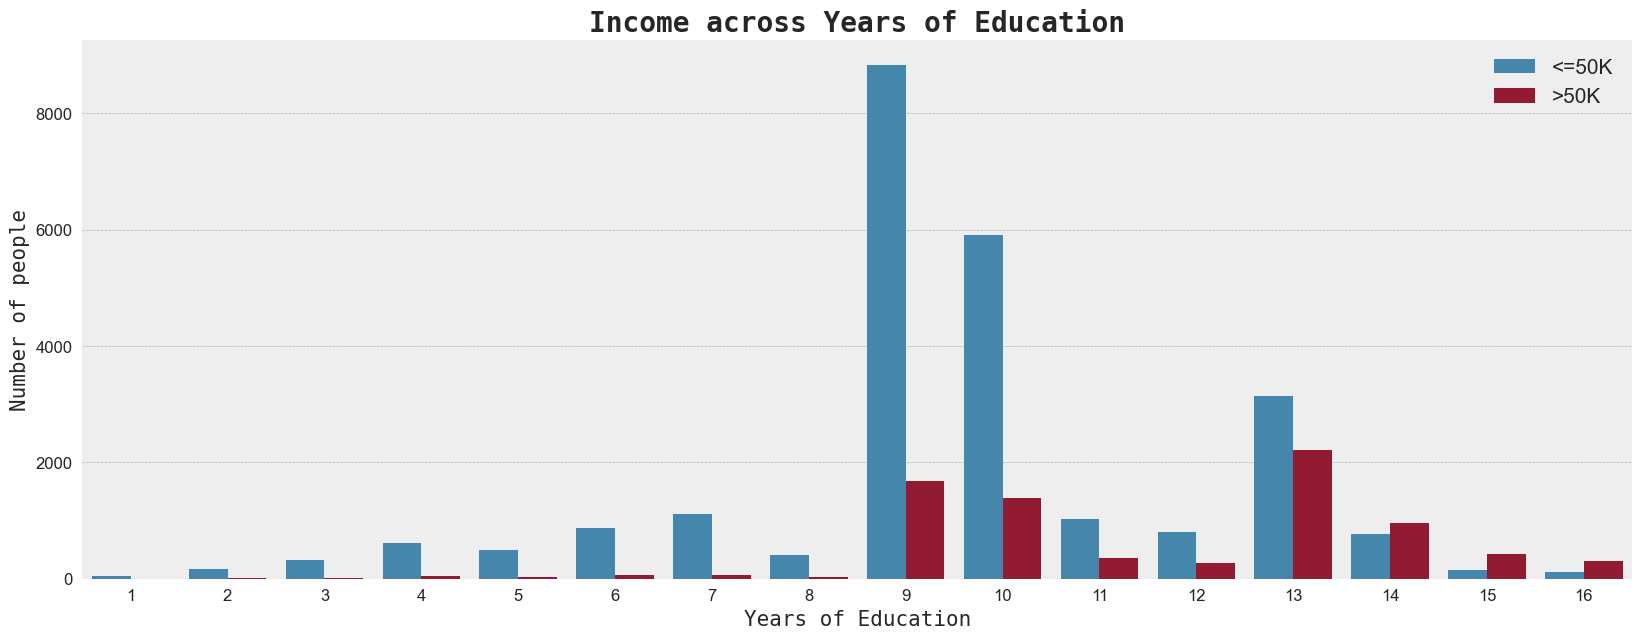

In [35]:
plt.style.use('bmh')
plt.figure(figsize=(20, 7))
sns.countplot(x=dataset['education.num'],
              hue=dataset['income'])
plt.title('Income across Years of Education', fontdict={
          'fontname': 'Monospace', 'fontsize': 20, 'fontweight': 'bold'})
plt.xlabel('Years of Education', fontdict={
           'fontname': 'Monospace', 'fontsize': 15})
plt.ylabel('Number of people', fontdict={
           'fontname': 'Monospace', 'fontsize': 15})
plt.tick_params(labelsize=12)
plt.legend(loc=1, prop={'size': 15})
plt.savefig('bi2.png')
plt.show()

- Creating a countplot of income across Marital Status.

Let's just get married. This statistic indicates a high probability that our income will be more than 50K after marriage. When unmarried or divorced, the income of most people will be less than 50K. Get married and limit your divorce, bro.

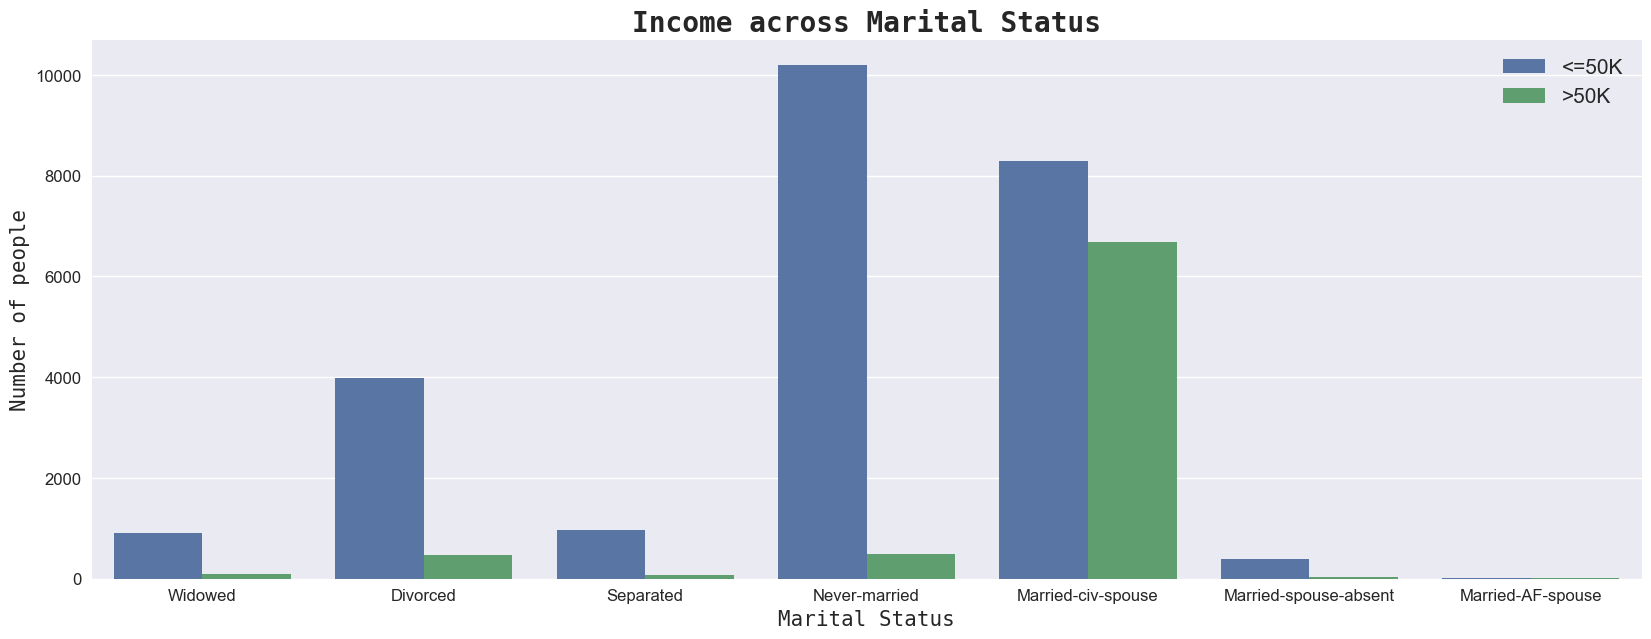

In [36]:
plt.style.use('seaborn')
plt.figure(figsize=(20, 7))
sns.countplot(x=dataset['marital.status'], hue=dataset['income'])
plt.title('Income across Marital Status', fontdict={
          'fontname': 'Monospace', 'fontsize': 20, 'fontweight': 'bold'})
plt.xlabel('Marital Status', fontdict={
           'fontname': 'Monospace', 'fontsize': 15})
plt.ylabel('Number of people', fontdict={
           'fontname': 'Monospace', 'fontsize': 15})
plt.tick_params(labelsize=12)
plt.legend(loc=1, prop={'size': 15})
plt.show()

- Creating a countplot of income across race

The percentage of whites with incomes higher than 50K is higher than other ethnicities. If you are black or Asian, as mentioned above, to increase your income you need to study harder and then get married.

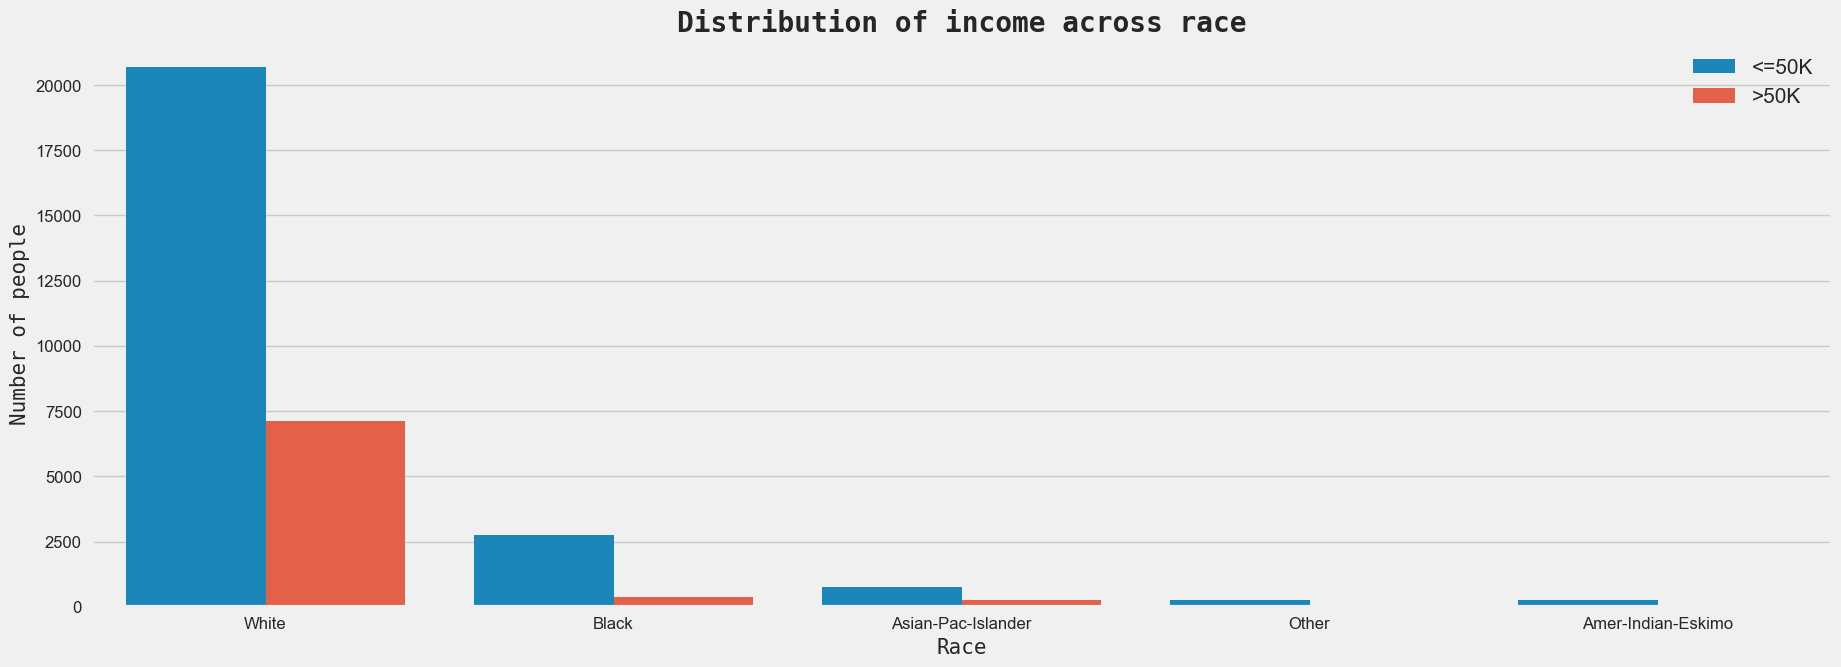

In [37]:
plt.style.use('fivethirtyeight')
plt.figure(figsize=(20, 7))
sns.countplot(x=dataset['race'], hue=dataset['income'])
plt.title('Distribution of income across race', fontdict={
          'fontname': 'Monospace', 'fontsize': 20, 'fontweight': 'bold'})
plt.xlabel('Race', fontdict={
           'fontname': 'Monospace', 'fontsize': 15})
plt.ylabel('Number of people', fontdict={
           'fontname': 'Monospace', 'fontsize': 15})
plt.tick_params(labelsize=12)
plt.legend(loc=1, prop={'size': 15})
plt.show()

- Creating a countplot of income across sex

If you are a man, the possibility that you have an income greater than 50K will be higher. This makes sense since men have many biological advantages over women.

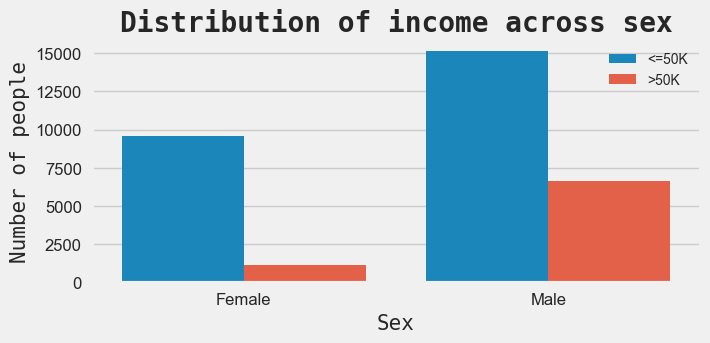

In [38]:
plt.style.use('fivethirtyeight')
plt.figure(figsize=(7, 3))
sns.countplot(x=dataset['sex'], hue=dataset['income'])
plt.title('Distribution of income across sex', fontdict={
          'fontname': 'Monospace', 'fontsize': 20, 'fontweight': 'bold'})
plt.xlabel('Sex', fontdict={
           'fontname': 'Monospace', 'fontsize': 15})
plt.ylabel('Number of people', fontdict={
           'fontname': 'Monospace', 'fontsize': 15})
plt.tick_params(labelsize=12)
plt.legend(loc=1, prop={'size': 10})
plt.savefig('bi3.png')
plt.show()

### 2.3: Multivariate Analysis

In [39]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [40]:
dataset['income'] = le.fit_transform(dataset['income'])

In [41]:
# <=50K:0 and >50K: 1
dataset['income'].value_counts()

0    24720
1     7841
Name: income, dtype: int64

In [42]:
# Creating a pairplot of dataset
# sns.pairplot(dataset)
# plt.savefig('multi1.png')
# plt.show()

- Creating a heatmap of correlation of all features

We see that age and years of education have a strong correlation with the income of each citizen.

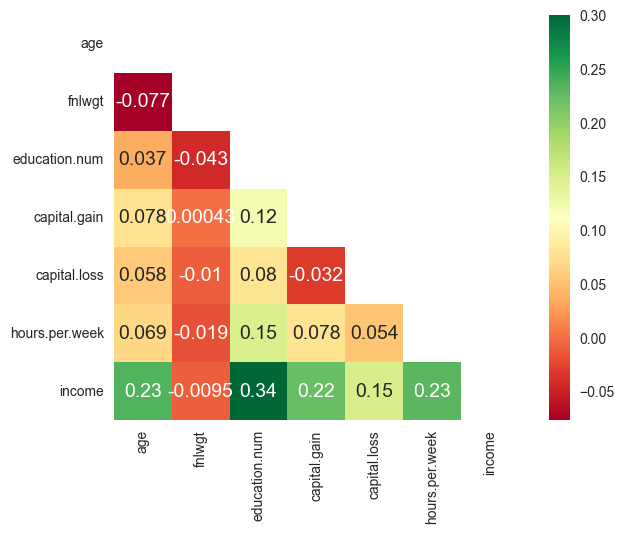

In [43]:
corr = dataset.corr()
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
    f, ax = plt.subplots(figsize=(7, 5))
    ax = sns.heatmap(corr, mask=mask, vmax=.3, square=True,
                     annot=True, cmap='RdYlGn')
plt.savefig('multi2.png')
plt.show()

<div class="alert alert-block alert-info">

<h3 style="font-family:verdana;"> Observations:</h3>

<ul>
        
<li><p style="font-family:verdana;">
In this dataset, the most number of people are young, white, male, high school graduates with 9 to 10 years of education and work 40 hours per week.
</p></li>    

<li><p style="font-family:verdana;">
From the correlation heatmap, we can see that the dependent feature 'income' is highly correlated with age, numbers of years of education, capital gain and number of hours per week.
</p></li>    

</ul>

</div>

### Step 3. Feature Engineering : 
Skewness/Inconsistent/Missing/Outlier Handling, 
Feature Enrichment, Feature Transformation, Feature Selection, Feature Encoding, 
Feature Scaling (Normalization & Standardization)

In [44]:
# Missing Data 
dataset = dataset.replace('?', np.nan)

In [45]:
# Checking null values
round((dataset.isnull().sum() / dataset.shape[0]) * 100, 2).astype(str) + ' %'

age                0.0 %
workclass         5.64 %
fnlwgt             0.0 %
education          0.0 %
education.num      0.0 %
marital.status     0.0 %
occupation        5.66 %
relationship       0.0 %
race               0.0 %
sex                0.0 %
capital.gain       0.0 %
capital.loss       0.0 %
hours.per.week     0.0 %
native.country    1.79 %
income             0.0 %
dtype: object

In [46]:
columns_with_nan = ['workclass', 'occupation', 'native.country']

In [47]:
for col in columns_with_nan:
    dataset[col].fillna(dataset[col].mode()[0], inplace=True)

In [48]:
dataset.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education.num     0
marital.status    0
occupation        0
relationship      0
race              0
sex               0
capital.gain      0
capital.loss      0
hours.per.week    0
native.country    0
income            0
dtype: int64

In [49]:
print(dataset.shape)
print(dataset[dataset["capital.gain"] == 0].shape)
print(dataset[dataset["capital.loss"] == 0].shape)
# (32561, 15)
# (29849, 15)
# (31042, 15)

(32561, 15)
(29849, 15)
(31042, 15)


In [50]:
cg = str(round((dataset[dataset["capital.gain"] == 0].shape[0] / dataset.shape[0])
      * 100, 2)) + ' %'
print("capital.gain=0: " + cg)
cg = str(round((dataset[dataset["capital.loss"] == 0].shape[0] / dataset.shape[0])
      * 100, 2)) + ' %'
print("capital.loss=0: " + cg)

capital.gain=0: 91.67 %
capital.loss=0: 95.33 %


In [51]:
# Feature Selection
dataset = dataset.drop(["capital.gain", "capital.loss"], axis = 1)

In [52]:
# All skews < 2
dataset.skew()

age               0.558743
fnlwgt            1.446980
education.num    -0.311676
hours.per.week    0.227643
income            1.212430
dtype: float64

In [53]:
# Feature Encoding 
from sklearn.preprocessing import LabelEncoder

In [54]:
for col in dataset.columns:
    if dataset[col].dtypes == 'object':
        encoder = LabelEncoder()
        dataset[col] = encoder.fit_transform(dataset[col])

In [55]:
dataset.dtypes

age               int64
workclass         int32
fnlwgt            int64
education         int32
education.num     int64
marital.status    int32
occupation        int32
relationship      int32
race              int32
sex               int32
hours.per.week    int64
native.country    int32
income            int32
dtype: object

In [56]:
X = dataset.drop('income', axis=1)
Y = dataset['income']

In [57]:
X.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,hours.per.week,native.country
0,90,3,77053,11,9,6,9,1,4,0,40,38
1,82,3,132870,11,9,6,3,1,4,0,18,38
2,66,3,186061,15,10,6,9,4,2,0,40,38
3,54,3,140359,5,4,0,6,4,4,0,40,38
4,41,3,264663,15,10,5,9,3,4,0,40,38


In [58]:
Y.head()

0    0
1    0
2    0
3    0
4    0
Name: income, dtype: int32

In [59]:
# Decision tree
from sklearn.ensemble import ExtraTreesClassifier
selector = ExtraTreesClassifier(random_state=42)

In [60]:
selector.fit(X, Y)

ExtraTreesClassifier(random_state=42)

In [61]:
feature_imp = selector.feature_importances_

In [62]:
list_of_tuples = list(zip(X.columns.tolist(), feature_imp.tolist()))
list_of_tuples.sort(key=lambda tup: tup[1], reverse=True)
for feature, val in list_of_tuples :
    print(feature, round((val * 100), 2))

fnlwgt 20.43
age 18.28
hours.per.week 11.05
education.num 9.47
relationship 9.14
occupation 8.39
marital.status 8.11
workclass 4.66
education 4.19
sex 2.91
native.country 1.71
race 1.66


In [63]:
X = X.drop(['workclass', 'education', 'race', 'sex', 'native.country'], axis=1)

In [64]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   age             32561 non-null  int64
 1   fnlwgt          32561 non-null  int64
 2   education.num   32561 non-null  int64
 3   marital.status  32561 non-null  int32
 4   occupation      32561 non-null  int32
 5   relationship    32561 non-null  int32
 6   hours.per.week  32561 non-null  int64
dtypes: int32(3), int64(4)
memory usage: 1.4 MB


In [65]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler

In [66]:
for col in X.columns:
    scaler = StandardScaler()
    X[col] = scaler.fit_transform(X[col].values.reshape(-1, 1))

### Step 5. Dataset Partition : 
Imblanced Handling, Train Test Split 

In [67]:
round(Y.value_counts(normalize=True) * 100, 2).astype('str') + ' %'

0    75.92 %
1    24.08 %
Name: income, dtype: object

In [68]:
# Create more data 
from imblearn.over_sampling import RandomOverSampler
ros = RandomOverSampler(random_state=42)

In [69]:
ros.fit(X, Y)

RandomOverSampler(random_state=42)

In [70]:
X_resampled, Y_resampled = ros.fit_resample(X, Y)

In [71]:
round(Y_resampled.value_counts(normalize=True) * 100, 2).astype('str') + ' %'

0    50.0 %
1    50.0 %
Name: income, dtype: object

In [72]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(
    X_resampled, Y_resampled, test_size=0.2, random_state=42)

In [73]:
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("Y_train shape:", Y_train.shape)
print("Y_test shape:", Y_test.shape)

X_train shape: (39552, 7)
X_test shape: (9888, 7)
Y_train shape: (39552,)
Y_test shape: (9888,)


## Step 6. Data Modelling : 
Try many ML methods

In [74]:
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression(random_state=42)

In [75]:
log_reg.fit(X_train, Y_train)

LogisticRegression(random_state=42)

In [76]:
Y_pred_log_reg = log_reg.predict(X_test)

In [77]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()

In [78]:
knn.fit(X_train, Y_train)

KNeighborsClassifier()

In [79]:
Y_pred_knn = knn.predict(X_test)

In [80]:
from sklearn.svm import SVC
svc = SVC(random_state=42)

In [81]:
svc.fit(X_train, Y_train)

SVC(random_state=42)

In [82]:
Y_pred_svc = svc.predict(X_test)

In [83]:
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()

In [84]:
nb.fit(X_train, Y_train)

GaussianNB()

In [85]:
Y_pred_nb = nb.predict(X_test)

In [86]:
from sklearn.tree import DecisionTreeClassifier
dec_tree = DecisionTreeClassifier(random_state=42)

In [87]:
dec_tree.fit(X_train, Y_train)

DecisionTreeClassifier(random_state=42)

In [88]:
Y_pred_dec_tree = dec_tree.predict(X_test)

In [89]:
from sklearn.ensemble import RandomForestClassifier
ran_for = RandomForestClassifier(random_state=42)

In [90]:
ran_for.fit(X_train, Y_train)

RandomForestClassifier(random_state=42)

In [91]:
Y_pred_ran_for = ran_for.predict(X_test)

In [92]:
from xgboost import XGBClassifier
xgb = XGBClassifier()

In [93]:
xgb.fit(X_train, Y_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, feature_types=None, gamma=0, gpu_id=-1,
              grow_policy='depthwise', importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_bin=256, max_cat_threshold=64, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0, ...)

In [94]:
Y_pred_xgb = xgb.predict(X_test)

### Step 6. Data Evaluation : 
Display Metrics for Classification (Accuracy, Precision, Recall), 

Display Metrics for Regression (R2Score, MSE, RMSE)

In [95]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score

In [96]:
print('Logistic Regression:')
print('Accuracy score:', round(accuracy_score(Y_test, Y_pred_log_reg) * 100, 2))
print('F1 score:', round(f1_score(Y_test, Y_pred_log_reg) * 100, 2))

Logistic Regression:
Accuracy score: 73.64
F1 score: 74.01


In [97]:
print('KNN Classifier:')
print('Accuracy score:', round(accuracy_score(Y_test, Y_pred_knn) * 100, 2))
print('F1 score:', round(f1_score(Y_test, Y_pred_knn) * 100, 2))

KNN Classifier:
Accuracy score: 81.92
F1 score: 83.13


In [98]:
print('Support Vector Classifier:')
print('Accuracy score:', round(accuracy_score(Y_test, Y_pred_svc) * 100, 2))
print('F1 score:', round(f1_score(Y_test, Y_pred_svc) * 100, 2))

Support Vector Classifier:
Accuracy score: 80.37
F1 score: 81.51


In [99]:
print('Naive Bayes Classifier:')
print('Accuracy score:', round(accuracy_score(Y_test, Y_pred_nb) * 100, 2))
print('F1 score:', round(f1_score(Y_test, Y_pred_nb) * 100, 2))

Naive Bayes Classifier:
Accuracy score: 77.74
F1 score: 78.45


In [100]:
print('Decision Tree Classifier:')
print('Accuracy score:', round(accuracy_score(Y_test, Y_pred_dec_tree) * 100, 2))
print('F1 score:', round(f1_score(Y_test, Y_pred_dec_tree) * 100, 2))

Decision Tree Classifier:
Accuracy score: 89.9
F1 score: 90.49


In [101]:
print('Random Forest Classifier:')
print('Accuracy score:', round(accuracy_score(Y_test, Y_pred_ran_for) * 100, 2))
print('F1 score:', round(f1_score(Y_test, Y_pred_ran_for) * 100, 2))

Random Forest Classifier:
Accuracy score: 91.38
F1 score: 91.84


In [102]:
print('XGB Classifier:')
print('Accuracy score:', round(accuracy_score(Y_test, Y_pred_xgb) * 100, 2))
print('F1 score:', round(f1_score(Y_test, Y_pred_xgb) * 100, 2))

XGB Classifier:
Accuracy score: 84.07
F1 score: 84.85


In [103]:
# Step 8. Hyper-parameter Tuning : 
# Tuning parameters: Cross Validation (CV), GridSearchCV, Regularization (L1, L2 penalty)

In [104]:
from sklearn.model_selection import RandomizedSearchCV

In [105]:
n_estimators = [int(x) for x in np.linspace(start=60,stop=150, num=5)]
max_depth = [int(x) for x in np.linspace(40, 100, num=5)]

In [106]:
param_dist = {
    'n_estimators': n_estimators,
    'max_depth': max_depth,
}

In [107]:
rf_tuned = RandomForestClassifier(random_state=42)

In [108]:
rf_cv = RandomizedSearchCV(
    estimator=rf_tuned, param_distributions=param_dist, cv=5, random_state=42)

In [109]:
rf_cv.fit(X_train, Y_train)

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42),
                   param_distributions={'max_depth': [40, 55, 70, 85, 100],
                                        'n_estimators': [60, 82, 105, 127,
                                                         150]},
                   random_state=42)

In [110]:
rf_cv.best_score_

0.9012439655388702

In [111]:
rf_cv.best_params_

{'n_estimators': 60, 'max_depth': 40}

In [112]:
# Step 9. Build the pipeline with the best Model with the best parameters
# Choose best hyper-parameters and build best models

In [113]:
rf_best = RandomForestClassifier(
    max_depth=rf_cv.best_params_['max_depth'], n_estimators=rf_cv.best_params_['n_estimators'], random_state=42)

In [114]:
rf_best.fit(X_train, Y_train)

RandomForestClassifier(max_depth=40, n_estimators=60, random_state=42)

In [115]:
Y_pred_rf_best = rf_best.predict(X_test)

In [116]:
print('Random Forest Classifier:')
print('Accuracy score:', round(accuracy_score(Y_test, Y_pred_rf_best) * 100, 2))
print('F1 score:', round(f1_score(Y_test, Y_pred_rf_best) * 100, 2))

Random Forest Classifier:
Accuracy score: 91.42
F1 score: 91.87


In [117]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y_test, Y_pred_rf_best)

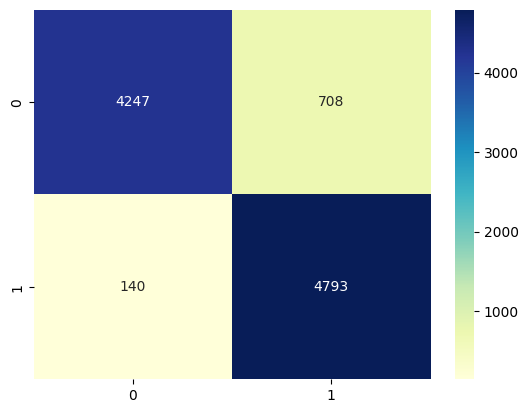

In [118]:
plt.style.use('default')
sns.heatmap(cm, annot=True, fmt='d', cmap='YlGnBu')
plt.savefig('heatmap.png')
plt.show()

In [430]:
from sklearn.metrics import classification_report
print(classification_report(Y_test, Y_pred_rf_best))

              precision    recall  f1-score   support

           0       0.97      0.86      0.91      4955
           1       0.87      0.97      0.92      4933

    accuracy                           0.91      9888
   macro avg       0.92      0.91      0.91      9888
weighted avg       0.92      0.91      0.91      9888



<div class="alert alert-block alert-info">

<h3 style="font-family:verdana;"> Conclusion:</h3>

<ul>
    
<li><p style="font-family:verdana;">
In this project, we build various models like logistic regression, knn classifier, support vector classifier, decision tree classifier, random forest classifier and xgboost classifier.
</p></li>    

<li><p style="font-family:verdana;">
A hyperparameter tuned random forest classifier gives the highest accuracy score of 91.87 and f1 score of 91.42.

</ul>

</div>